In [ ]:
pip install swig

  Using cached swig-4.3.1-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (3.5 kB)
Using cached swig-4.3.1-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.9 MB)


In [ ]:
pip install "gymnasium[box2d]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (box2d-py)



Testing: LR=0.001, GAMMA=0.95, EPSILON_DECAY=0.995


<ipython-input-13-9649cfc66118>:66: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  states = torch.FloatTensor(states)


Episode 0, Reward: -274.46, Epsilon: 0.995
Episode 1, Reward: -101.08, Epsilon: 0.990
Episode 2, Reward: -367.31, Epsilon: 0.985
Episode 3, Reward: -120.07, Epsilon: 0.980
Episode 4, Reward: -149.07, Epsilon: 0.975
Episode 5, Reward: -242.66, Epsilon: 0.970
Episode 6, Reward: -232.14, Epsilon: 0.966
Episode 7, Reward: -112.11, Epsilon: 0.961
Episode 8, Reward: -139.76, Epsilon: 0.956
Episode 9, Reward: -185.70, Epsilon: 0.951
Episode 10, Reward: -304.17, Epsilon: 0.946
Episode 11, Reward: -144.80, Epsilon: 0.942
Episode 12, Reward: -55.20, Epsilon: 0.937
Episode 13, Reward: -321.89, Epsilon: 0.932
Episode 14, Reward: -169.00, Epsilon: 0.928
Episode 15, Reward: -154.28, Epsilon: 0.923
Episode 16, Reward: -67.95, Epsilon: 0.918
Episode 17, Reward: -102.56, Epsilon: 0.914
Episode 18, Reward: -90.91, Epsilon: 0.909
Episode 19, Reward: -47.14, Epsilon: 0.905
Episode 20, Reward: -86.04, Epsilon: 0.900
Episode 21, Reward: -132.59, Epsilon: 0.896
Episode 22, Reward: -0.88, Epsilon: 0.891
Episo

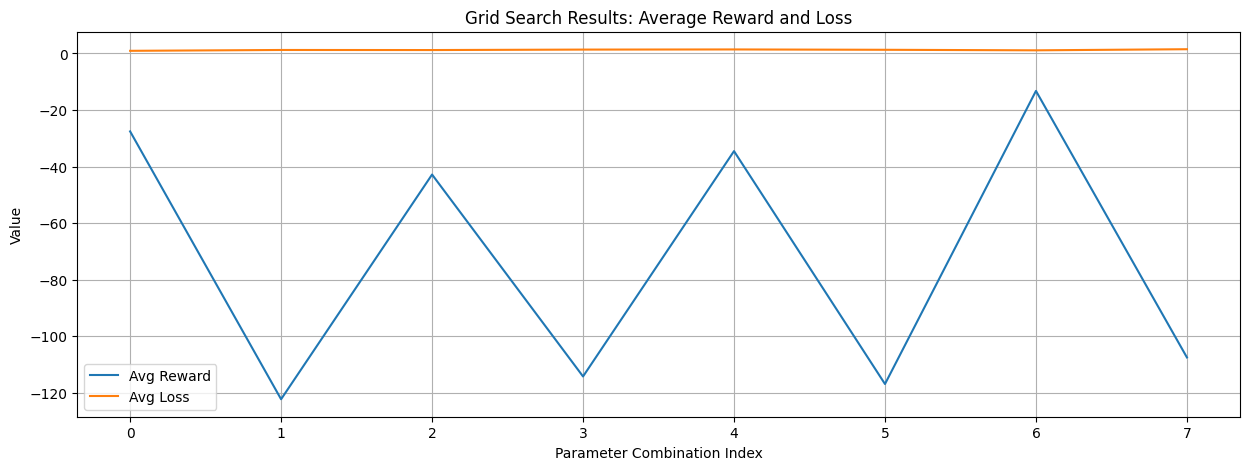


Best hyperparameters found:
LR=0.0001, GAMMA=0.99, EPSILON_DECAY=0.995

Training final model with best parameters...
Episode 0, Reward: -205.69, Epsilon: 0.995
Episode 1, Reward: -88.04, Epsilon: 0.990
Episode 2, Reward: -114.07, Epsilon: 0.985
Episode 3, Reward: -301.36, Epsilon: 0.980
Episode 4, Reward: -258.18, Epsilon: 0.975
Episode 5, Reward: -146.03, Epsilon: 0.970
Episode 6, Reward: -316.34, Epsilon: 0.966
Episode 7, Reward: -139.27, Epsilon: 0.961
Episode 8, Reward: -107.50, Epsilon: 0.956
Episode 9, Reward: -186.58, Epsilon: 0.951
Episode 10, Reward: -200.33, Epsilon: 0.946
Episode 11, Reward: -204.06, Epsilon: 0.942
Episode 12, Reward: -53.54, Epsilon: 0.937
Episode 13, Reward: -299.20, Epsilon: 0.932
Episode 14, Reward: -125.33, Epsilon: 0.928
Episode 15, Reward: -170.83, Epsilon: 0.923
Episode 16, Reward: -161.39, Epsilon: 0.918
Episode 17, Reward: -148.90, Epsilon: 0.914
Episode 18, Reward: -160.78, Epsilon: 0.909
Episode 19, Reward: -39.35, Epsilon: 0.905
Episode 20, Rew

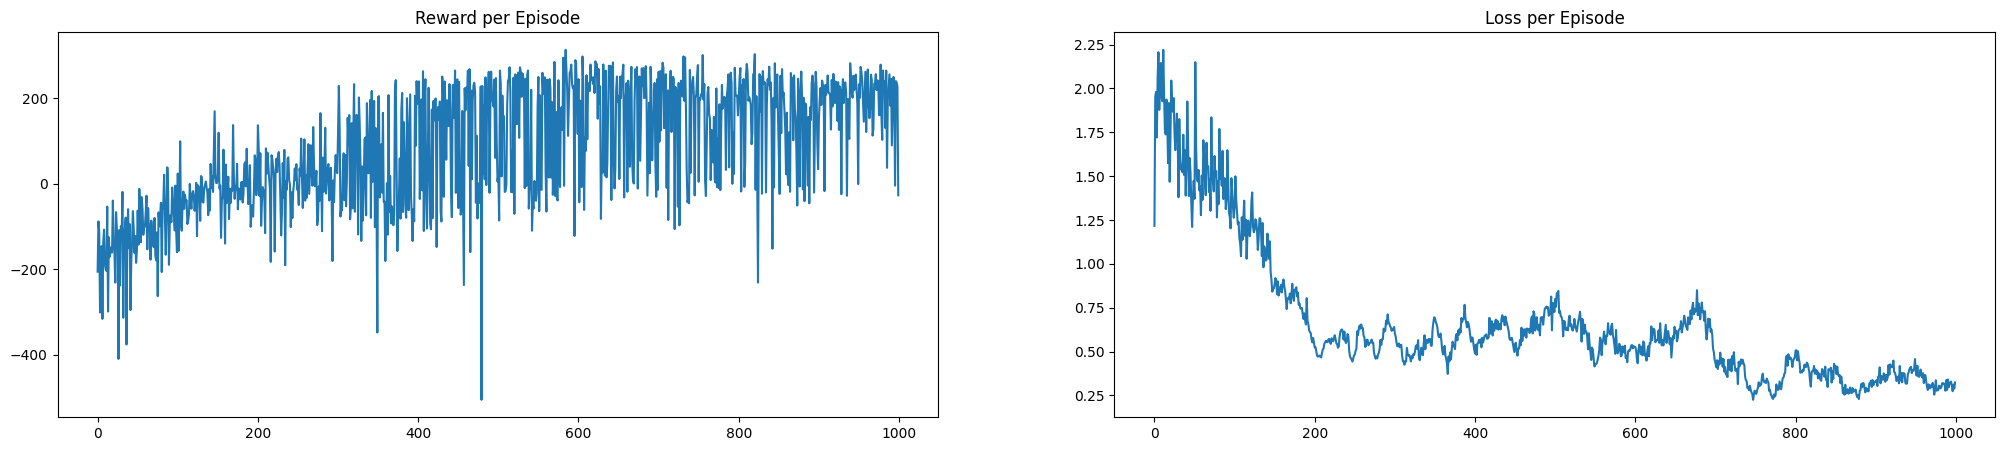

In [ ]:
# Import required libraries
import gymnasium as gym  # For the LunarLander environment
import numpy as np  # For numerical operations
import random  # For random action selection
import torch  # PyTorch for deep learning
import torch.nn as nn  # Neural network modules
import torch.optim as optim  # Optimization algorithms
from collections import deque  # For replay buffer implementation
import matplotlib.pyplot as plt  # For plotting results

# Hyperparameters (will be updated in grid search)
EPISODES = 1000  # Total number of training episodes (default, will be overridden in grid search phase 1)
GAMMA = 0.95  # Discount factor for future rewards
LR = 1e-4  # Learning rate for the optimizer
BATCH_SIZE = 64  # Number of experiences sampled from replay buffer
MEMORY_SIZE = 10000  # Maximum size of experience replay buffer
TARGET_UPDATE = 10  # Frequency (in episodes) for updating target network
EPSILON_START = 1.0  # Initial exploration rate (100% random actions)
EPSILON_END = 0.01  # Minimum exploration rate (1% random actions)
EPSILON_DECAY = 0.997  # Rate at which epsilon decays each episode

# Define Q-Network (Deep Q-Network)
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        # Neural network architecture with 3 linear layers and ReLU activations
        self.net = nn.Sequential(
            nn.Linear(state_dim, 128),  # Input layer
            nn.ReLU(),  # Activation function
            nn.Linear(128, 128),  # Hidden layer
            nn.ReLU(),  # Activation function
            nn.Linear(128, action_dim)  # Output layer (Q-values for each action)
        )

    def forward(self, x):
        # Forward pass through the network
        return self.net(x)

# Create replay buffer for experience replay
def replay_buffer():
    # Returns a deque with maximum size MEMORY_SIZE
    return deque(maxlen=MEMORY_SIZE)

# Epsilon-greedy action selection
def select_action(state, policy_net, epsilon, action_dim):
    if random.random() < epsilon:
        # Random action (exploration)
        return random.randint(0, action_dim - 1)
    else:
        # Action with highest Q-value (exploitation)
        with torch.no_grad():
            state = torch.FloatTensor(state).unsqueeze(0)
            return policy_net(state).argmax().item()

# Perform one training step
def train_step(policy_net, target_net, memory, optimizer):
    # Skip if not enough experiences in memory
    if len(memory) < BATCH_SIZE:
        return 0

    # Sample random batch from replay memory
    batch = random.sample(memory, BATCH_SIZE)
    states, actions, rewards, next_states, dones = zip(*batch)

    # Convert to PyTorch tensors
    states = torch.FloatTensor(states)
    actions = torch.LongTensor(actions).unsqueeze(1)
    rewards = torch.FloatTensor(rewards).unsqueeze(1)
    next_states = torch.FloatTensor(next_states)
    dones = torch.FloatTensor(dones).unsqueeze(1)

    # Compute current Q-values for taken actions
    q_values = policy_net(states).gather(1, actions)

    # Compute next Q-values from target network
    next_q_values = target_net(next_states).max(1)[0].detach().unsqueeze(1)

    # Compute expected Q-values using Bellman equation
    expected_q_values = rewards + GAMMA * next_q_values * (1 - dones)

    # Compute Huber loss between current and expected Q-values
    loss = nn.SmoothL1Loss()(q_values, expected_q_values)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.item()

# Main training function
def train():
    # Initialize environment
    env = gym.make("LunarLander-v3")
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    # Initialize networks
    policy_net = DQN(state_dim, action_dim)  # Policy network (updated frequently)
    target_net = DQN(state_dim, action_dim)  # Target network (updated less frequently)
    target_net.load_state_dict(policy_net.state_dict())  # Synchronize weights
    optimizer = optim.Adam(policy_net.parameters(), lr=LR)  # Adam optimizer
    memory = replay_buffer()  # Experience replay buffer

    epsilon = EPSILON_START  # Initialize exploration rate
    all_rewards = []  # Store rewards for each episode
    all_losses = []  # Store losses for each episode

    # Training loop
    for episode in range(EPISODES):
        state, _ = env.reset()
        total_reward = 0
        losses = []

        done = False
        while not done:
            # Select and execute action
            action = select_action(state, policy_net, epsilon, action_dim)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # Store experience in replay buffer
            memory.append((state, action, reward, next_state, float(done)))

            # Train on sampled batch
            loss = train_step(policy_net, target_net, memory, optimizer)
            if loss:
                losses.append(loss)

            state = next_state
            total_reward += reward

        # Decay epsilon
        epsilon = max(EPSILON_END, epsilon * EPSILON_DECAY)

        # Update target network periodically
        if episode % TARGET_UPDATE == 0:
            target_net.load_state_dict(policy_net.state_dict())

        # Store metrics
        all_rewards.append(total_reward)
        all_losses.append(np.mean(losses) if losses else 0)

        # Print progress
        print(f"Episode {episode}, Reward: {total_reward:.2f}, Epsilon: {epsilon:.3f}")

    env.close()
    # Save trained model for inference
    torch.save(policy_net.state_dict(), "dqn_lunarlander.pth")
    print("Model saved as dqn_lunarlander.pth")
    return all_rewards, all_losses

# Plot training results
def plot_results(rewards, losses):
    plt.figure(figsize=(25, 5))
    plt.subplot(1, 2, 1)
    plt.plot(rewards)
    plt.title("Reward per Episode")
    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.title("Loss per Episode")
    plt.show()

# Plot grid search results
def plot_grid_metrics(avg_rewards, avg_losses):
    x = np.arange(len(avg_rewards))
    plt.figure(figsize=(15, 5))
    plt.plot(x, avg_rewards, label="Avg Reward")
    plt.plot(x, avg_losses, label="Avg Loss")
    plt.xlabel("Parameter Combination Index")
    plt.ylabel("Value")
    plt.title("Grid Search Results: Average Reward and Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Grid search for hyperparameter optimization
def grid_search():
    # Define parameter grid to search
    param_grid = {
        "LR": [1e-3, 1e-4],  # Learning rates to try
        "GAMMA": [0.95, 0.99],  # Discount factors to try
        "EPSILON_DECAY": [0.995, 0.999]  # Epsilon decay rates to try
    }

    best_reward = float('-inf')  # Track best average reward
    best_params = None  # Store best parameters
    global EPISODES
    avg_rewards_all = []  # Store average rewards for all combinations
    avg_losses_all = []  # Store average losses for all combinations

    # Phase 1: Grid Search (short training)
    EPISODES = 200  # Fewer episodes for faster grid search
    for lr in param_grid["LR"]:
        for gamma in param_grid["GAMMA"]:
            for epsilon_decay in param_grid["EPSILON_DECAY"]:
                global LR, GAMMA, EPSILON_DECAY
                LR = lr
                GAMMA = gamma
                EPSILON_DECAY = epsilon_decay

                print(f"\nTesting: LR={lr}, GAMMA={gamma}, EPSILON_DECAY={epsilon_decay}")
                rewards, losses = train()
                avg_reward = np.mean(rewards[-100:])  # Average of last 100 episodes
                avg_loss = np.mean(losses[-100:])  # Average of last 100 episodes
                avg_rewards_all.append(avg_reward)
                avg_losses_all.append(avg_loss)
                print(f"Average reward (last 100 episodes): {avg_reward:.2f}")
                print(f"Average loss (last 100 episodes): {avg_loss:.4f}")

                if avg_reward > best_reward:
                    best_reward = avg_reward
                    best_params = (lr, gamma, epsilon_decay)

    # Plot grid search results
    plot_grid_metrics(avg_rewards_all, avg_losses_all)

    print("\nBest hyperparameters found:")
    print(f"LR={best_params[0]}, GAMMA={best_params[1]}, EPSILON_DECAY={best_params[2]}")

    # Phase 2: Final training with best parameters
    LR, GAMMA, EPSILON_DECAY = best_params
    EPISODES = 1000  # Full training with best parameters
    print("\nTraining final model with best parameters...")
    final_rewards, final_losses = train()
    plot_results(final_rewards, final_losses)

if __name__ == "__main__":
    grid_search()

**Generating GIF**

In [ ]:
!pip install imageio


In [ ]:
!pip install box2d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 40.1 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import torch
import torch.nn as nn
import imageio

# Define the same DQN structure used during training
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_dim)
        )

    def forward(self, x):
        return self.net(x)

# Create the environment with RGB rendering
env = gym.make("LunarLander-v3", render_mode="rgb_array")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# Initialize and load the trained model
policy_net = DQN(state_dim, action_dim)
policy_net.load_state_dict(torch.load("dqn_lunarlander.pth"))
policy_net.eval()

# Initialize frame buffer and environment state
frames = []
state, _ = env.reset()
done = False
step = 0
max_steps = 2000
post_landing_frames = 30  # Record extra frames after landing

# Run the agent
while not done and step < max_steps:
    frame = env.render()
    frames.append(frame)

    with torch.no_grad():
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        action = policy_net(state_tensor).argmax().item()

    next_state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    state = next_state
    step += 1

# Add post-landing frames to complete the animation
for _ in range(post_landing_frames):
    frame = env.render()
    frames.append(frame)

env.close()

# Save frames as animated GIF
imageio.mimsave("lunarlander_agent.gif", frames, fps=20)
print("GIF saved as lunarlander_agent.gif")


GIF saved as lunarlander_agent.gif
